<a href="https://colab.research.google.com/github/fwkhan/CE888/blob/main/assignment1/Assignment1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This Scrip contains all the wrapper functions for performing EDA. 
#For all the three tasks EDA is done through this Script. I have created wrapper functions for that, so all the plots and figures are displayed at the end of the script when the perform_eda() api is invoked. I have provided option to perform all the EDA in for loop for all the three dataset; however, that makes visualization difficult. Therefore, I have also provided option to perform EDA for all the three data sets separately for better visualization

In [ ]:
!pip install --upgrade plotly

Requirement already up-to-date: plotly in /usr/local/lib/python3.7/dist-packages (4.14.3)


# Downloading necessities for nltk

In [ ]:
  import nltk
  nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Importing Necesseties 

In [ ]:
import re
import string
import requests
import numpy as np 
import random
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


from tqdm import tqdm
import os
import spacy
from spacy.util import compounding
from spacy.util import minibatch

import warnings
warnings.filterwarnings("ignore")

# Hardcoding commands for print beautification
print_format_tab_start = '\t \x1b[1;31m'
print_format_start = '\x1b[1;31m'
print_format_end = '\x1b[0m'

# Declaring URL link related to all the three datasets

# **Sentiment Analysi, Hate, Offensive and Irony dataset fron TweetEval**

In [ ]:
############################ SENTIMENT ANALYSIS #################################################
SENTIMENT_TRAIN_TEXT = 'https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/sentiment/train_text.txt'
SENTIMENT_VALIDATION_TEXT = 'https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/sentiment/val_text.txt'
SENTIMENT_TEST_TEXT = 'https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/sentiment/test_text.txt'

SENTIMENT_TRAIN_LABEL = 'https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/sentiment/train_labels.txt'
SENTIMENT_VALIDATION_LABEL = 'https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/sentiment/val_labels.txt'
SENTIMENT_TEST_LABEL = 'https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/sentiment/test_labels.txt'

############################ HATE #################################################
HATE_TRAIN_TEXT = 'https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/hate/train_text.txt'
HATE_VALIDATION_TEXT = 'https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/hate/val_text.txt'
HATE_TEST_TEXT = 'https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/hate/test_text.txt'

HATE_TRAIN_LABEL = 'https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/hate/train_labels.txt'
HATE_VALIDATION_LABEL = 'https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/hate/val_labels.txt'
HATE_TEST_LABEL = 'https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/hate/test_labels.txt'

############################ OFFENSIVE LANGUAGE#################################################
OFFENSE_TRAIN_TEXT = 'https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/offensive/train_text.txt'
OFFENSE_VALIDATION_TEXT = 'https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/offensive/val_text.txt'
OFFENSE_TEST_TEXT = 'https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/offensive/test_text.txt'

OFFENSE_TRAIN_LABEL = 'https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/offensive/train_labels.txt'
OFFENSE_VALIDATION_LABEL = 'https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/offensive/val_labels.txt'
OFFENSE_TEST_LABEL = 'https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/offensive/test_labels.txt'

#In this part, text files are read from github, converted to pandsas dataframe and then processing is done to get rid of noise in the data. All the special characters are removed, words are lower-cased, lemmatization is done instead of stemming, all the words whose length is less than 2 are filtered, getting rid of 'user' from texts and calcualting the length of each tweet and storing it in dataframe.

In [ ]:
def preprocess(df, EDA=False): 
    lemmatizer  = WordNetLemmatizer()
    ignore_words = ['user', 'st'] 
    # Removing all the words not starting from alphabets A to Z(case insensitive)
    df['processed_tweets'] = df['tweet'].replace('[^a-zA-Z]',' ', regex=True,
                                                  inplace=False)
    # Tokenizing and Converting to lower case.
    df['processed_tweets'] = df['processed_tweets'].apply(lambda x: [w.lower() for w in x.split()])

    if not EDA: # For EDA, not removing any word from the tweet
      df['processed_tweets'] = df['processed_tweets'].apply(lambda tweet: ([word for word in tweet if not word in stopwords.words("english")]))
      df['processed_tweets'] = df['processed_tweets'].apply(lambda tweet: ([lemmatizer.lemmatize(word) for word in tweet]))
    else:
      df['processed_tweets'] = df['processed_tweets'].apply(lambda tweet: ' '.join([word for word in tweet if len(word)>2]))
      df['processed_tweets'] = df['processed_tweets'].apply(lambda x: ' '.join([word for word in x.split() if not word in ignore_words]))
    # Calculate sentence length for each tweet and store it in data frame
    df["sentence_length"] = df.tweet.apply(lambda x: len(str(x).split()))
    return df


# Wrapper to convert text data to pandas Dataframe
def txt_to_df(data, label, classification_task):
    tweet = []
    sentiments = []
    # Split the input string by new line and store in tweet list
    for sentence in data.split('\n'):
        tweet.append(sentence)
    # Split labels by new line and store it in sentiments list
    for sentiment in label.split('\n'):
        # Exception handling is done since the last line is is empty in th
        # original text file and we get system error as we try to cast to int.
        try:
            sentiments.append(int(sentiment))
        except ValueError:
            pass
    # converting list to dataframe and removing the last blank line
    df= pd.DataFrame(tweet[:-1], columns=['tweet'])
    df['label'] = sentiments # this colums contains labels in int format
    # Converting labels to corresponding string based on the task type.
    if classification_task == 'Sentiment_analysis':
      df['sentiment'] = df.label.apply(lambda x: 'Negative'if x==0 else ('Neutral' if x==1 else 'Positive'))
    if classification_task == 'hate_analysis':
      df['sentiment'] = df.label.apply(lambda x: 'Not-hate'if x==0 else 'hate')
    if classification_task == 'offensive_analysis':
      df['sentiment'] = df.label.apply(lambda x: 'Not-offensive'if x==0 else 'offensive')
    return df


def prepare_dataset(TRAIN_TEXT, TRAIN_LABEL, VAL_TEXT, VAL_LABEL, TEST_TEXT, TEST_LABEL, classification_task, EDA=False):
  # Reading Train, Vvalidation & Test data from tweeteval Github Repo.
  train_tweets_txt = requests.get(TRAIN_TEXT).text
  train_labels_txt = requests.get(TRAIN_LABEL).text

  val_tweets_txt = requests.get(VAL_TEXT).text
  val_labels_txt = requests.get(VAL_LABEL).text

  test_tweets_txt = requests.get(TEST_TEXT).text
  test_labels_txt = requests.get(TEST_LABEL).text

  # Converting text data to pandas Dataframe
  train_df = txt_to_df(train_tweets_txt, train_labels_txt, classification_task)
  val_df = txt_to_df(val_tweets_txt, val_labels_txt, classification_task)
  test_df = txt_to_df(test_tweets_txt, test_labels_txt, classification_task)

  # Preporcessing the tweets before performing any further operations,
  # New column in the data frame is created of processed tweets.
  train_df = preprocess(train_df, EDA)
  val_df = preprocess(val_df, EDA)
  test_df = preprocess(test_df, EDA)  

  return train_df, val_df, test_df



# EDA

## Wrapper API to plot percentage of each class in the training dataset.
We do see imbalance the training data set, for which we perform RandomOversampling of the minority class.

In [ ]:
# Plotting frequency of each class in the training data.

def plot_class_distribution(data):
  print(print_format_tab_start+'Pie Chart of Class distribution in the training dataset'+print_format_end)
  sns.set_palette('Pastel1_r')
  eda_df = data.groupby('sentiment').count()['tweet'].reset_index().sort_values(by='tweet',ascending=False)
  labels = list(eda_df.sentiment)
  sizes = list(eda_df.tweet)

  fig1, ax1 = plt.subplots()
  ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
  plt.show()

## Wrapper for Removing stopwords, so that the plot doesn't contain meaningless words

In [ ]:
def remove_stopword(x):
    return [y for y in x if y not in stopwords.words('english')]

## Wrapper to get frequency of most frequent 20 words in the corpus

In [ ]:
def Get_word_frequency(data):
  frequent_words = Counter([item for sublist in data['words'] for item in sublist])
  frequent_20_words = pd.DataFrame(frequent_words.most_common(20))
  frequent_20_words.columns = ['Common_words','count']
  return frequent_20_words

## Wrapper to PLOT frequency of most frequent 20 words in the corpus

In [ ]:
def plot_word_frequency(frequent_20_words, sentiment=''):
  fig = px.bar(frequent_20_words, x="count", y="Common_words", title=f'Most Frequent {sentiment} Words', orientation='h', width=800, height=500, color='Common_words')
  fig.show()
  plt.show()

## Wrapper to PLOT TREE MAP of frequency of most frequent 20 words in the corpus

In [ ]:
def plot_tree_map(frequent_20_words, sentiment=''):
  fig = px.treemap(frequent_20_words, path=['Common_words'], values='count',title=f'Tree of Most Frequent {sentiment} Words', width=1000, height=500, color='Common_words')
  fig.show()
  plt.show()

## Wrapper function that invokes all the above defined plotting APIs

In [ ]:
def train_data_eda(data):
  plot_class_distribution(data)
  data['words'] = data['processed_tweets'].apply(lambda x:str(x).split())
  data['words'] = data['words'].apply(lambda x:remove_stopword(x))
  tweets_word_frequency = Get_word_frequency(data)
  tweets_word_frequency.style.background_gradient(cmap='cool_r')
  
  plot_word_frequency(tweets_word_frequency)
  plot_tree_map(tweets_word_frequency)
  return data

## Wrapper function to visualize words in each class - their frequency.
It also highlights common words across classes.


In [ ]:
def plot_words_class_basis(data):
  # Create list of words specific to Each class
  class_df_list = [] # list of all the classes DataFrame e.g. negative_df, posivtive_df, neutral_df
  class_specific_word_frequency = []

  # class_dict[classification_task] this command gives the classificatoin task - EX. HATE, OFFENSIVE etc.
  # class_dict[classification_task][index] - gives the class in that classification task - EX. HATE, NOT-HATE

  # Creating list of dataframe. List will have 2 or 3 elements, depending on the classificaton task.
  # EX. First element - dataframe containing all the positive words
  #    Second element - dataframe containing all the negative words

  # len(class_dict[classification_task]) give the number of classes 
  # EX for sentiment analysis - 3 classes
  # For other two - 2 classes
  for i in range(len(class_dict[classification_task])):
    class_df_list.append(data[data['sentiment']==class_dict[classification_task][i]])

  # Get frequency of each word in the dataframe stored in class_df_list
  # EX. Frequency of positive words, frequency of Negative words and store in
  # a new list class_specific_word_frequency.
  for i in range(len(class_dict[classification_task])):
      class_specific_word_frequency.append(Get_word_frequency(class_df_list[i]))
      
  # Plotting word frequency of each class
  for i in range(len(class_dict[classification_task])):
    plot_word_frequency(class_specific_word_frequency[i], class_dict[classification_task][i])

  for i in range(len(class_dict[classification_task])):
    plot_tree_map(class_specific_word_frequency[i], class_dict[classification_task][i])
  return class_df_list


##WordClouds

We will be building wordclouds in the following order:

* WordCloud of Neutral Tweets
* WordCloud of Positive Tweets
* WordCloud of Negative Tweets

This gives sense of the frequent words in each class.


In [ ]:
def flatten_list(l):
    return [x for y in l for x in y]

# color coding our wordclouds 
def red_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return f"hsl(0, 100%, {random.randint(25, 75)}%)" 

def green_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return f"hsl({random.randint(90, 150)}, 100%, 30%)" 

def yellow_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return f"hsl(42, 100%, {random.randint(25, 50)}%)" 

  


def generate_word_clouds(class_df_list_flatten):
    # Display the generated image:

    color_funct_list = [red_color_func, green_color_func, yellow_color_func ] 

    fig, axes = plt.subplots(1,len(class_df_list_flatten), figsize=(20,10))
    wordcloud_class_list = []
    # Creating WordCloud for all the classes in loop
    print(print_format_tab_start+'WordCloud For all the Classes'+print_format_end)
    for i in range(len(class_df_list_flatten)):

      wordcloud_class_list.append(WordCloud(max_font_size=50, max_words=100, background_color="white").generate(" ".join(class_df_list_flatten[i])))
      axes[i].imshow(wordcloud_class_list[i].recolor(color_func=color_funct_list[i], random_state=3), interpolation='bilinear')
      axes[i].set_title(class_dict[classification_task][i])
      axes[i].axis("off")

    plt.tight_layout()
    plt.show();

In [ ]:
def visualize_word_clouds(class_df_list):
  class_df_list_flatten = []
  for i in range(len(class_dict[classification_task])):
    class_df_list_flatten.append(flatten_list(class_df_list[i]['words']))
  generate_word_clouds(class_df_list_flatten)

## Scatter plot using Word2Vec and TSNE to visualize the words with similar context on a scatter plot.
Example: words like days of the weeks or months in year get plotted together, this gives a sense that Word2Vec does a good job in extracting relationships between words

In [ ]:
from gensim.models import word2vec
from sklearn.manifold import TSNE

def tsne_plot(data):
    "Creates and TSNE model and plots it"
    print(print_format_tab_start+'3D plot w.r.t word context'+print_format_end)
    labels = []
    tokens = []
    model = word2vec.Word2Vec(data.words, size=300, window=20, min_count=50, workers=4)
    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=3, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(20, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

## Visaualtization using 3D scatter plot of training data.
This gives a sense of the word distribuiton with in each class. From the plots we get an idea that most of the words are sufficiently classified with very few samples crossing the classifcation boundary.

In [ ]:
# to split 30% to visualize later using PCA
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib
import matplotlib.patches as mp

def visualize_class_distribution_3d(data):
  print(print_format_tab_start+'3D scatter plot Class distribution in training data'+print_format_end)

  sns.set()
  count_vect = CountVectorizer(ngram_range=(1,3), lowercase=False)
  _, X_, _, y_, = train_test_split(data.processed_tweets.tolist(), data.sentiment.tolist(), test_size = 0.9)
  X_ = count_vect.fit_transform(X_)
  y_ = count_vect.transform(y_)
  unique_label = class_dict[classification_task]


  data_visual = TruncatedSVD(n_components = 3).fit_transform(X_)
  plt.rcParams["figure.figsize"] = [21, 10]
  ax = plt.subplot(111, projection='3d')
  colors = ['red', 'blue', 'green']
  color_patch = []
  for i in range(len(class_dict[classification_task])):
    color_patch.append(mp.Patch(color=colors[i],label=class_dict[classification_task][i]))
  current_palette = sns.color_palette()
  x = data_visual[:,0]
  y = data_visual[:, 1]
  z =  data_visual[:, 2]
  for no, _ in enumerate(np.unique(y_)):
      ax.scatter3D(x, y, z, c=x, label = unique_label[no], alpha = 0.5,
                  cmap=matplotlib.colors.ListedColormap(colors))
      
  box = ax.get_position()
  ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 1])
  ax.legend(handles=color_patch, loc = 'upper center', fancybox = True, shadow = True, ncol = 3)
  plt.show()

## Wrapper function that invokes all the above defined APIs

In [ ]:
def perform_eda(training_data):
  data = train_data_eda(training_data)
  class_df_list = plot_words_class_basis(data)
  visualize_word_clouds(class_df_list)
  tsne_plot(training_data)
  visualize_class_distribution_3d(training_data)

# Starting point of the script:
We declare classification task dictionary, over which we iterate for all the three tasks.

We, also declare class dictionary, which containes all the classes specific to a given task as values.

TRAIN_ALL: Flag to perform EDA for all the three tasks in loop, by default it is set to 'False' as we do the visualization separately.

In [ ]:
import warnings
warnings.filterwarnings('ignore')
TRAIN_ALL = False
#classification task dictionary, over which we iterate for all the three tasks.
classification_task_dict = {'SENTIMENT_ANALYSIS' : 'Sentiment_analysis',
                       'HATE_ANALYSIS' : 'hate_analysis',
                       'OFFENSIVE_LANGUAGE' : 'offensive_analysis'
                       }
# class dictionary, which containes all the classes specific to a given task as values                       
class_dict = {'SENTIMENT_ANALYSIS' :['Negative', 'Neutral', 'Positive'],
              'HATE_ANALYSIS' : ['Not-hate', 'hate'],
              'OFFENSIVE_LANGUAGE' : ['Not-offensive', 'offensive']}
# Flag to perform EDA for all the three tasks in loop, by default it is fault
# as we do the visualization separately
if TRAIN_ALL:
  for classification_task, task in classification_task_dict.items():
    print('=========================================')
    print('CLASSIFICATION TASK: {}'.format(classification_task))
    print('=========================================')
    if classification_task == 'SENTIMENT_ANALYSIS':
      train_df, val_df, test_df = prepare_dataset(SENTIMENT_TRAIN_TEXT, SENTIMENT_TRAIN_LABEL,
                          SENTIMENT_VALIDATION_TEXT, SENTIMENT_VALIDATION_LABEL,
                          SENTIMENT_TEST_TEXT, SENTIMENT_TEST_LABEL, classification_task_dict['SENTIMENT_ANALYSIS'],
                          EDA=True)

    if classification_task == 'HATE_ANALYSIS':
      train_df, val_df, test_df = prepare_dataset(HATE_TRAIN_TEXT, HATE_TRAIN_LABEL,
                          HATE_VALIDATION_TEXT, HATE_VALIDATION_LABEL,
                          HATE_TEST_TEXT, HATE_TEST_LABEL, classification_task_dict['HATE_ANALYSIS'],
                          EDA=True)

    if classification_task == 'OFFENSIVE_LANGUAGE':
      train_df, val_df, test_df = prepare_dataset(OFFENSE_TRAIN_TEXT, OFFENSE_TRAIN_LABEL,
                          OFFENSE_VALIDATION_TEXT, OFFENSE_VALIDATION_LABEL,
                          OFFENSE_TEST_TEXT, OFFENSE_TEST_LABEL, classification_task_dict['OFFENSIVE_LANGUAGE'],
                          EDA=True)
    perform_eda(train_df)



# Sentiment Analysis Visualization

	 Pie Chart of Class distribution in the training dataset


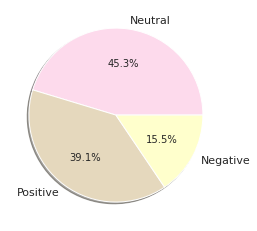

	 WordCloud For all the Classes


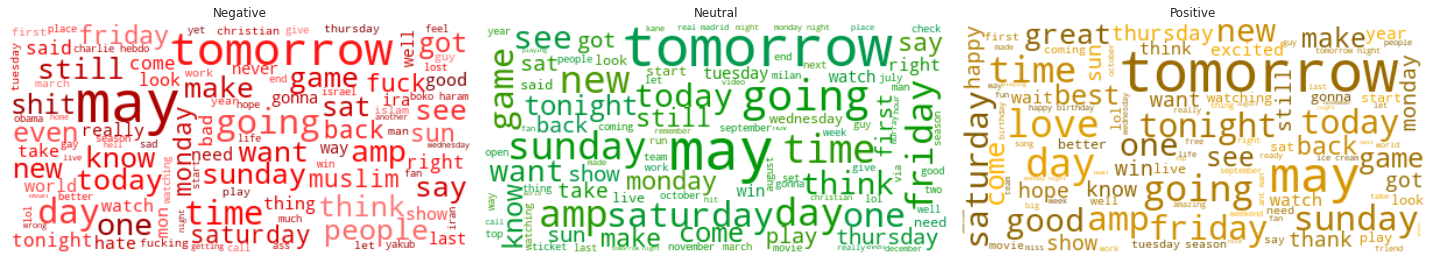

	 3D plot w.r.t word context


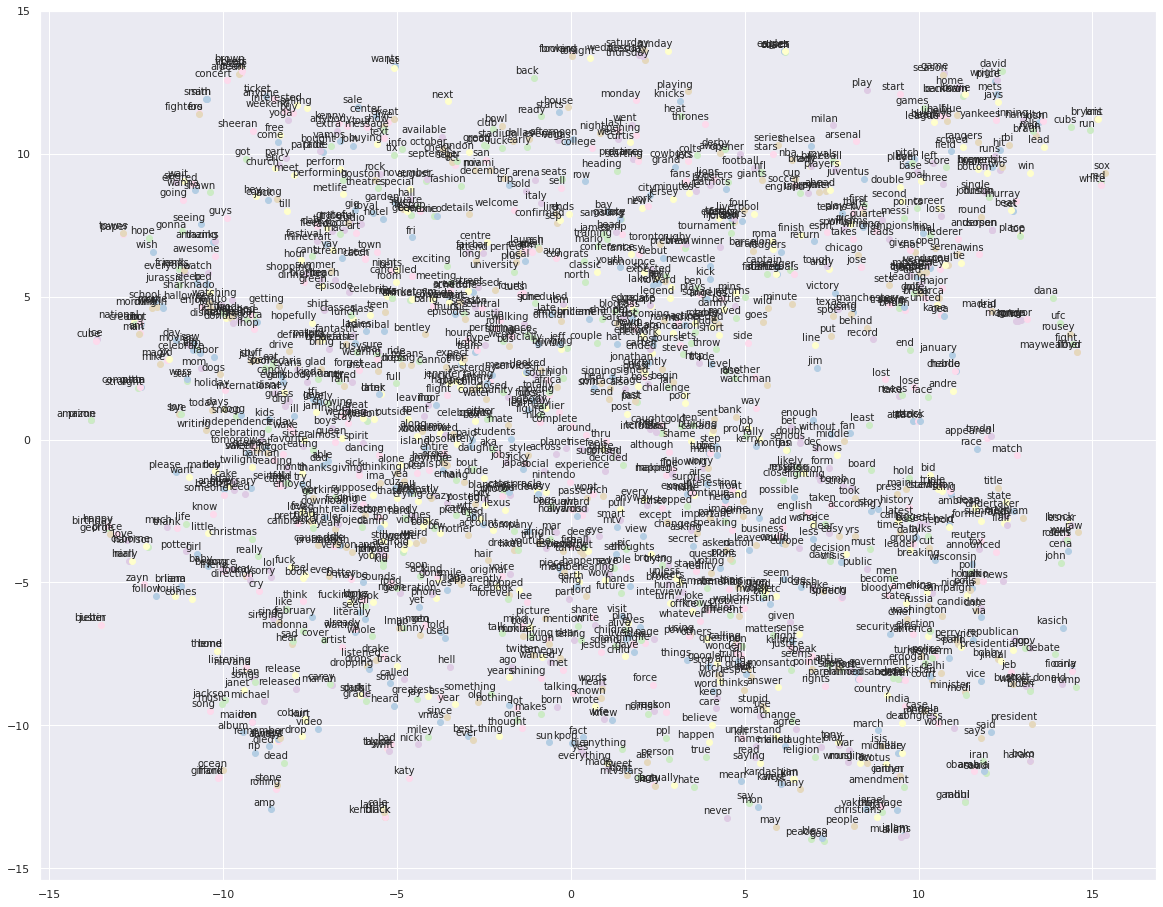

	 3D scatter plot Class distribution in training data


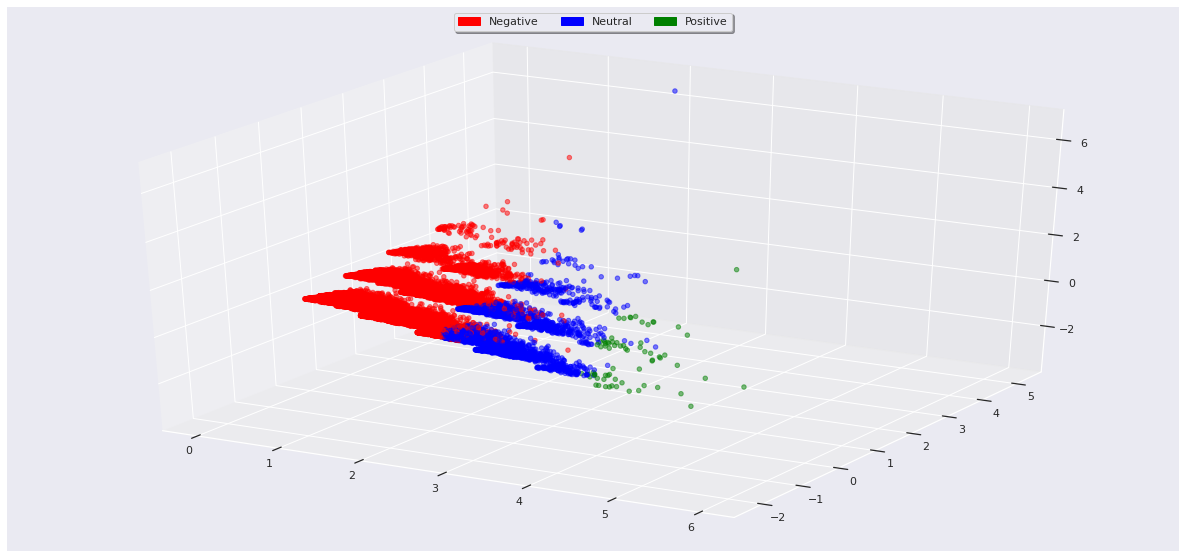

In [ ]:
classification_task = 'SENTIMENT_ANALYSIS'
train_df, val_df, test_df = prepare_dataset(SENTIMENT_TRAIN_TEXT, SENTIMENT_TRAIN_LABEL,
                    SENTIMENT_VALIDATION_TEXT, SENTIMENT_VALIDATION_LABEL,
                    SENTIMENT_TEST_TEXT, SENTIMENT_TEST_LABEL, classification_task_dict['SENTIMENT_ANALYSIS'],
                    EDA=True)
perform_eda(train_df)

# Hate Word Visualization

	 Pie Chart of Class distribution in the training dataset


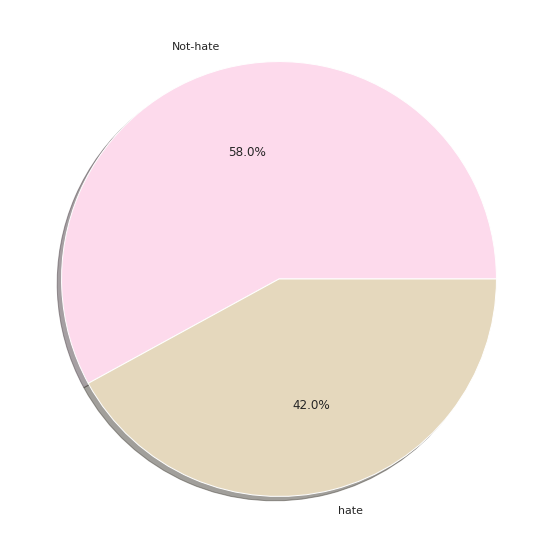

	 WordCloud For all the Classes


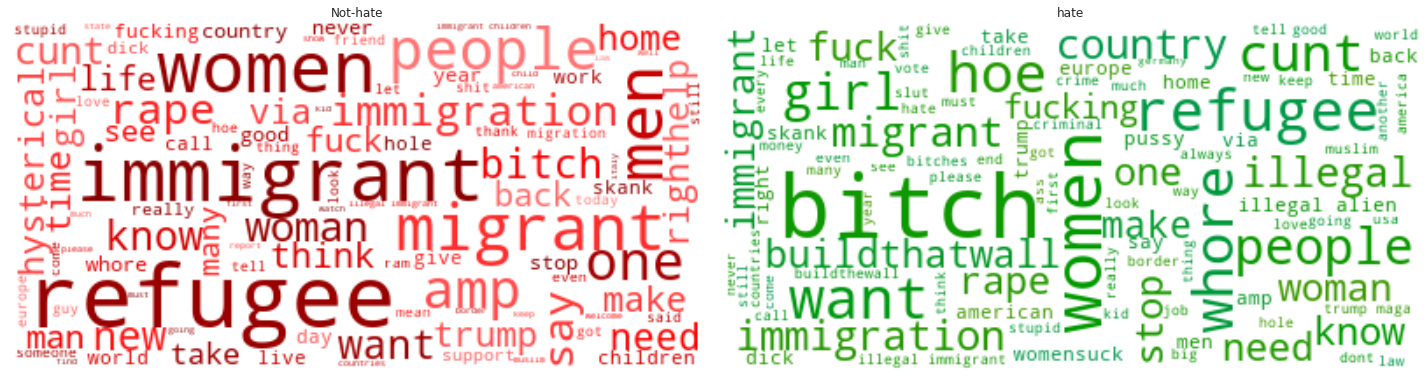

	 3D plot w.r.t word context


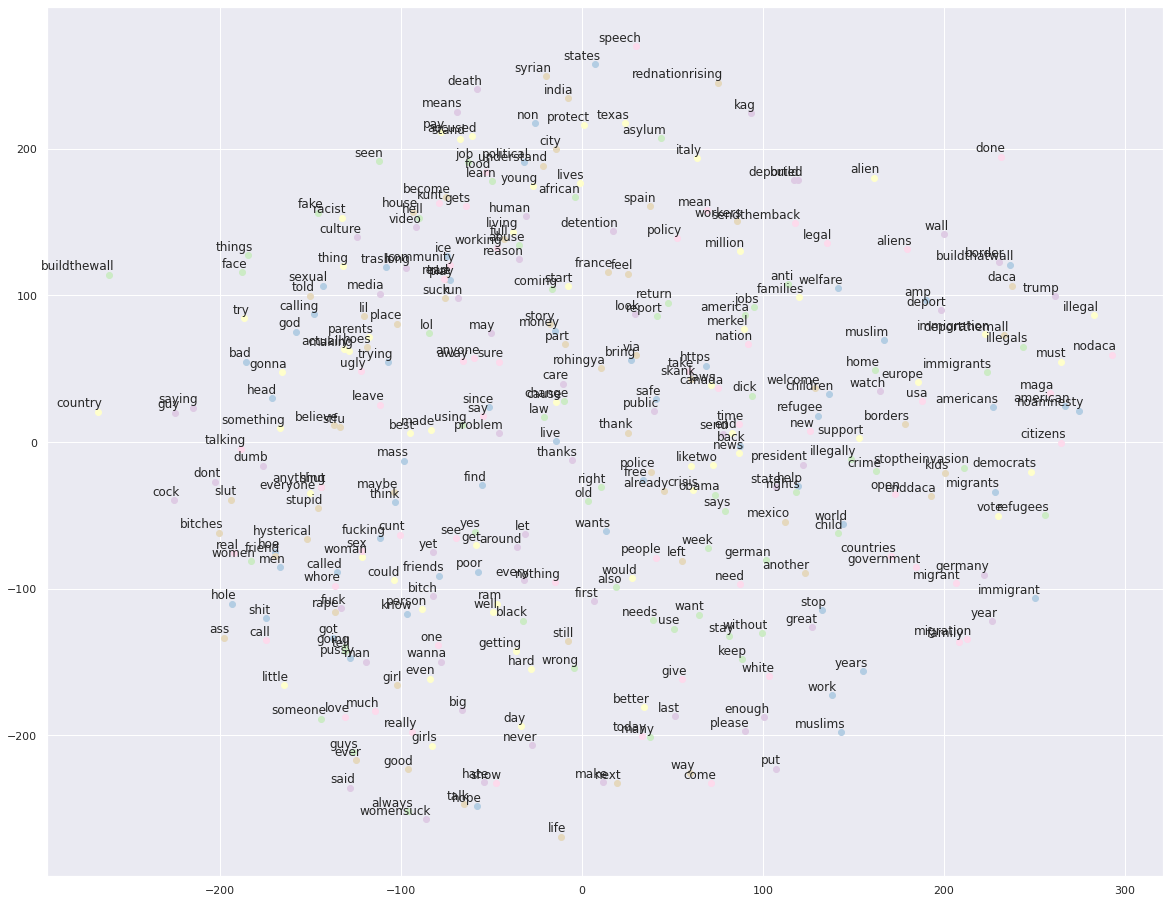

	 3D scatter plot Class distribution in training data


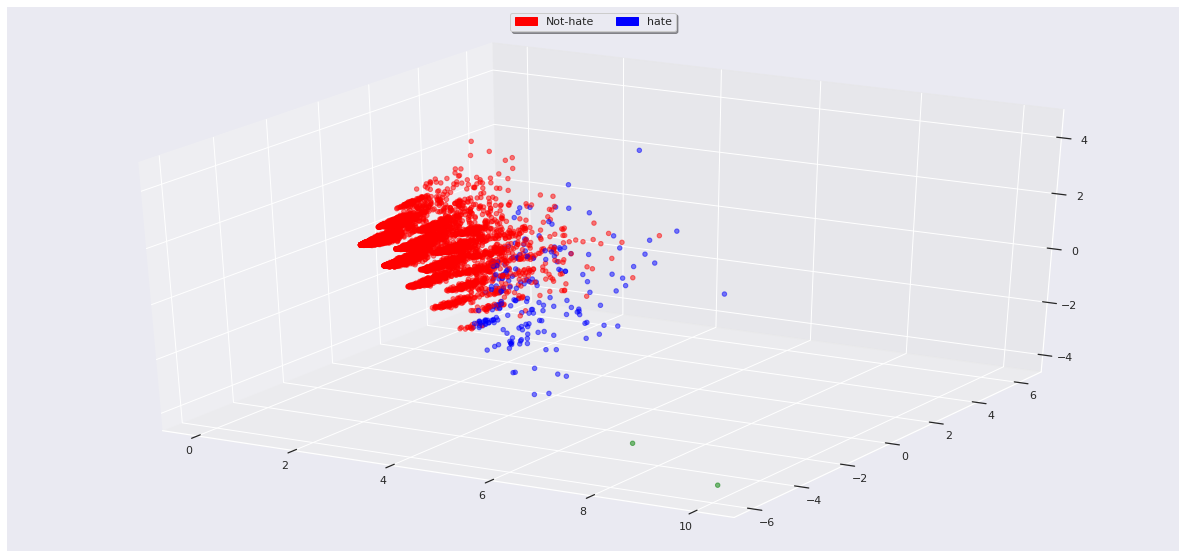

In [ ]:
classification_task = 'HATE_ANALYSIS'
train_df, val_df, test_df = prepare_dataset(HATE_TRAIN_TEXT, HATE_TRAIN_LABEL,
                    HATE_VALIDATION_TEXT, HATE_VALIDATION_LABEL,
                    HATE_TEST_TEXT, HATE_TEST_LABEL, classification_task_dict['HATE_ANALYSIS'],
                    EDA=True)
perform_eda(train_df)


# Offensive Language Visualization

	 Pie Chart of Class distribution in the training dataset


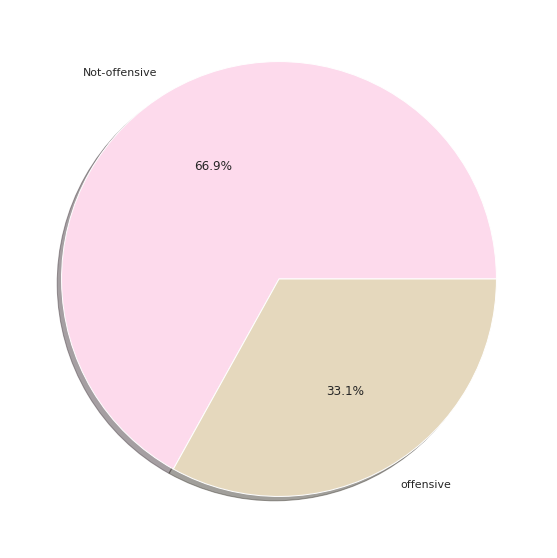

	 WordCloud For all the Classes


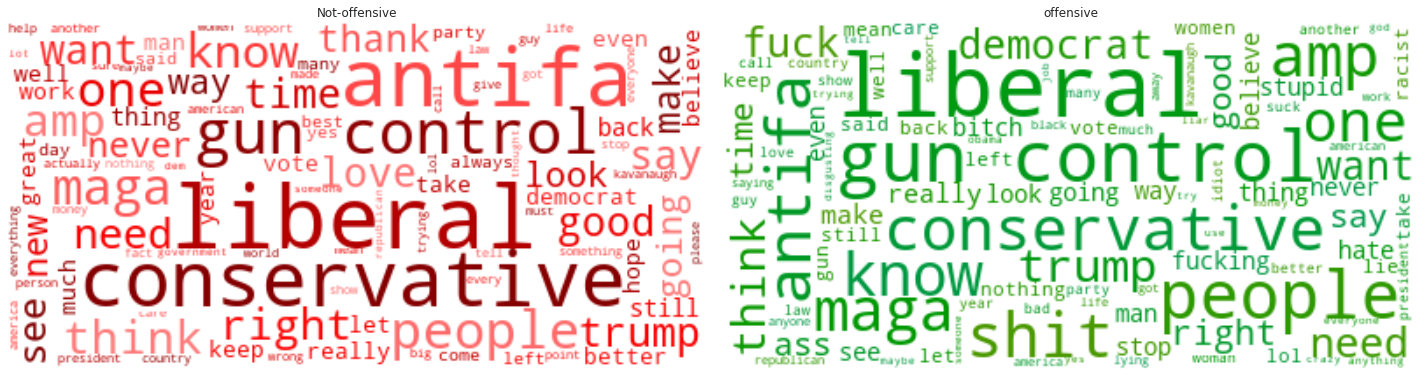

	 3D plot w.r.t word context


In [ ]:
classification_task = 'OFFENSIVE_LANGUAGE'
train_df, val_df, test_df = prepare_dataset(OFFENSE_TRAIN_TEXT, OFFENSE_TRAIN_LABEL,
                    OFFENSE_VALIDATION_TEXT, OFFENSE_VALIDATION_LABEL,
                    OFFENSE_TEST_TEXT, OFFENSE_TEST_LABEL, classification_task_dict['OFFENSIVE_LANGUAGE'],
                    EDA=True)
perform_eda(train_df)